# 1. Getting the Data

In [1]:
%pip install requests

import requests

url = "https://en.wikipedia.org/wiki/Data_science"
text = requests.get(url).content.decode("utf-8")
print(text[:1000])

Note: you may need to restart the kernel to use updated packages.
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientp

# 2. Transforming the Data

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True

    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False

    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += " " + data.replace("[ edit ]", "")

parser = MyHTMLParser()
parser.feed(text)

text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 Cloud computing for data science 5 Ethical consideration in data science 6 See also 7 References Toggle the table of contents Data science 48 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahas

# 3. Extracting Keywords

In [4]:
%pip install nlp_rake

import nlp_rake

extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
print(res)


Note: you may need to restart the kernel to use updated packages.
[('data scientist', 4.0), ('data visualization', 4.0), ('machine learning', 4.0), ('data mining', 4.0), ('sexiest job', 4.0), ('21st century', 4.0), ('big data', 4.0), ('data scientists', 4.0), ('data science', 3.901408450704225), ('computer science', 3.901408450704225), ('statistical learning', 3.9), ('information science', 3.8244853737811484), ('^ davenport', 3.8), ('cloud computing', 3.75), ('data analysis', 3.7058823529411766), ('extract insights', 3.5277777777777777), ('science', 1.9014084507042253), ('analysis', 1.7058823529411764), ('field', 1.4285714285714286), ('computational', 1.4), ('process', 1.25), ('statistics', 1.2173913043478262), ('thomas', 1.2), ('mathematics', 1.0), ('education', 1.0), ('communications', 1.0), ('archived', 1.0), ('original', 1.0), ('chikio', 1.0), ('forbes', 1.0)]


# 4. Visualizing

Note: you may need to restart the kernel to use updated packages.


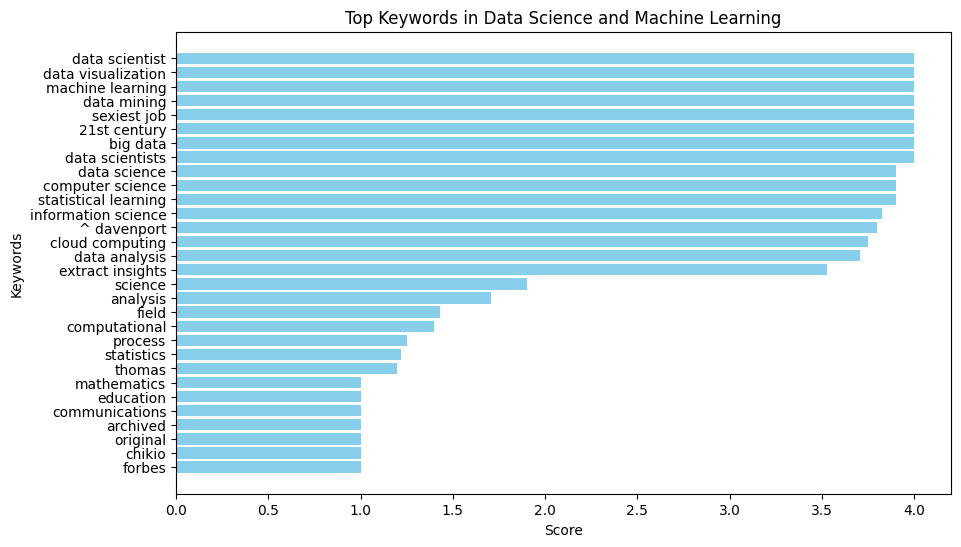

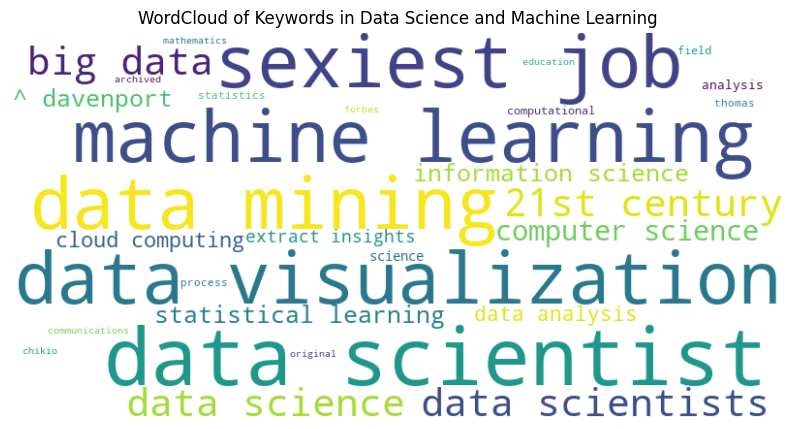

In [9]:
%pip install matplotlib wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extracting keywords and their scores
keywords, scores = zip(*res[:100])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(keywords, scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Keywords')
plt.title('Top Keywords in Data Science and Machine Learning')
plt.gca().invert_yaxis()
plt.show()

# Creating a dictionary for the WordCloud
wordcloud_dict = dict(res)

# Generating the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Plotting the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Keywords in Data Science and Machine Learning')
plt.show()